In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("driver.txt",sep = '\t', usecols = [1,2])
data.head(5)

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


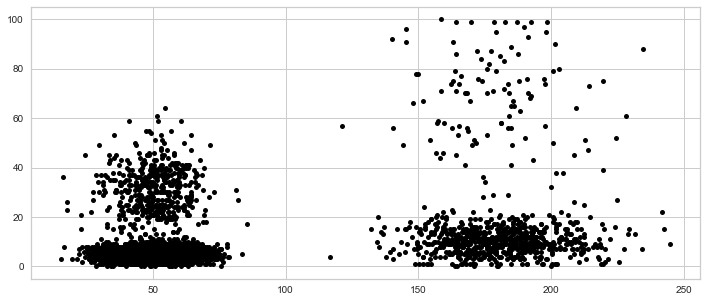

In [47]:
plt.figure(figsize = (12,5))
plt.plot(data.Distance_Feature, data.Speeding_Feature, '.', markersize = 10, color = "black")
plt.show()

In [48]:
mod_cluster = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
mod_cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [49]:
groups = mod_cluster.fit(data)
groups.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
classes = groups.labels_
print(classes)
data_draw = pd.DataFrame.copy(data)
data_draw['class'] = classes
data_draw.head(5)

[1 1 1 ... 0 0 0]


,Distance_Feature,Speeding_Feature,class
0,71.24,28.0,1
1,52.53,25.0,1
2,64.54,27.0,1
3,55.69,22.0,1
4,54.58,25.0,1


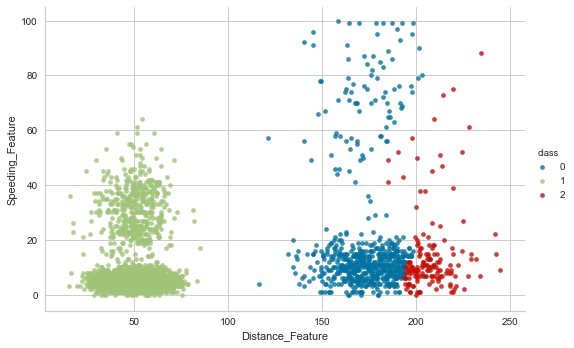

In [51]:
sns.lmplot(x = "Distance_Feature", y = "Speeding_Feature", data = data_draw, 
           hue = 'class',fit_reg=False, scatter_kws = {'s':22}, aspect = 1.5)

Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with Scikit-Learn. 
The library implements a new core API object, the "Visualizer" that is a scikit-learn estimator: 
an object that learns from data. Like transformers or models, visualizers learn from data by creating a 
visual representation of the model selection workflow.
    
conda install -c districtdatalabs yellowbrick

metric:
distortion: mean sum of squared distances to centers
silhouette: mean ratio of intra-cluster and nearest-cluster distance
calinski_harabaz: ratio of within to between cluster dispersion

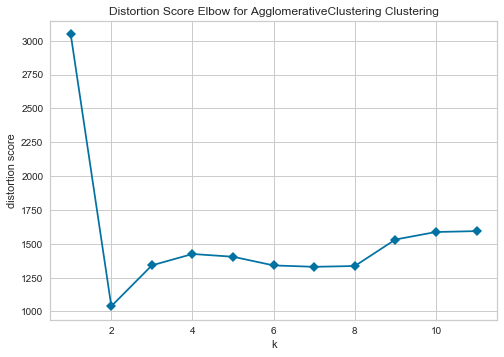

In [22]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False
)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [54]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
Distance_Feature,71.24,52.53,64.54,55.69,54.58,41.91,58.64,52.02,31.25,44.31,...,203.8,167.05,177.48,170.22,209.76,160.04,176.17,170.91,176.14,168.03
Speeding_Feature,28.00,25.00,27.00,22.00,25.00,10.00,20.00,8.00,34.00,19.00,...,22.0,10.00,19.00,16.00,18.00,10.00,5.00,12.00,5.00,9.00


In [68]:
data_np = np.copy(np.array(data[1:20]))
data_np

array([[52.53, 25.  ],
       [64.54, 27.  ],
       [55.69, 22.  ],
       [54.58, 25.  ],
       [41.91, 10.  ],
       [58.64, 20.  ],
       [52.02,  8.  ],
       [31.25, 34.  ],
       [44.31, 19.  ],
       [49.35, 40.  ],
       [58.07, 45.  ],
       [44.22, 22.  ],
       [55.73, 19.  ],
       [46.63, 43.  ],
       [52.97, 32.  ],
       [46.25, 35.  ],
       [51.55, 27.  ],
       [57.05, 26.  ],
       [58.45, 30.  ]])

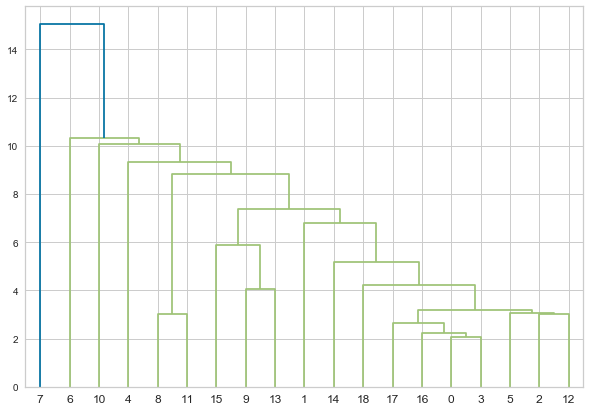

In [69]:
linked = linkage(data_np, 'single')

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation = 'top',
            distance_sort = 'descending',
            show_leaf_counts=True)
plt.show() 